# The Multiple Comparisons Problem

## Introduction

In this lesson, you'll learn about the problems that can arise from doing multiple comparisons in a single experiment.

## Objectives

You will be able to:

- Explain why multiple comparisons increases the likelihood of misleading results 
- Explain the concept of spurious correlation 
- Use corrections to deal with multiple comparison problems 


## What is the multiple comparisons problem?

Obtaining an incredibly low p-value does not guarantee that the null-hypothesis is incorrect. For example, a p-value of 0.001 states that there is still a 1 in 1000 chance that the null hypothesis is true. Yet, as you've seen, p-values alone can be misleading. For example, if you perform repeated experiments, at some point you're apt to stumble upon a small p-value, whether or not the null hypothesis is valid.

To restate this, imagine we take 100 scientific studies with a p-value of 0.03. Are all of these conclusions valid? Sadly, probably not. Remember, for any experiment with a p-value of 0.03, there is still a 3% chance that the null-hypothesis is actually true. So collectively, the probability that **all** of these null hypotheses are false is actually quite small. You can be fairly confident in each study, but there is also apt to be a false-conclusion drawn somewhere. (In fact, the p-value itself implies that, on average, 3 of these 100 conclusions will be false.)

In [1]:
0.97**100 # Probability all 100 experiments with p=0.03 are all true 

0.04755250792540563

Similarly, if you are testing multiple metrics simultaneously in an experiment, the chances that one of these will satisfy your alpha threshold increases. A fun similar phenomenon is spurious correlation. If we start comparing a multitude of quantities, we are bound to find some quantities that are highly correlated, whether or not an actual relationship exists. Tyler Vigen set out to find such relationships; here are a few entertaining ones (of many):  

<img src="../../../../images/nicolas_cage_vs_drowning.svg">
<img src="../../../../images/chicken_vs_oil.svg">
<img src="../../../../images/math_phds_vs_uranium.svg">
<img src="../../../../images/spelling_vs_spiders.svg">



As we can see, although these graphs show that each pair of quantities is strongly correlated, it seems unreasonable to expect that any of them have any causal relationships. Regardless of what the statistics tell us, there is no relationship through which the length of spelling bee word affects the number of people killed by venomous spiders

# Multiple Comparisons

In [7]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [3]:
np.random.seed(seed=42) # make example reproducible
# Dataset

n_samples, n_features = 100, 1000
n_info = int(n_features/10) # number of features with information
n1, n2 = int(n_samples/2), n_samples - int(n_samples/2)
snr = .5
Y = np.random.randn(n_samples, n_features)
grp = np.array(["g1"] * n1 + ["g2"] * n2)

# Add some group effect for Pinfo features
Y[grp=="g1", :n_info] += snr


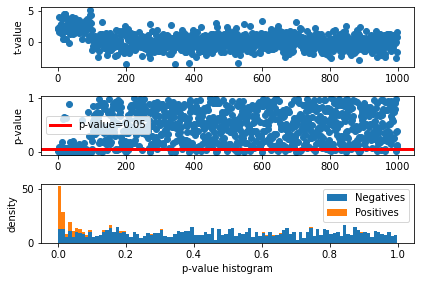

In [9]:
tvals, pvals = np.full(n_features, np.NAN), np.full(n_features, np.NAN)

for j in range(n_features):
    tvals[j], pvals[j] = stats.ttest_ind(Y[grp=="g1", j], Y[grp=="g2", j], equal_var=True)
    
# plot 3 plots    
fig, axis = plt.subplots(3, 1)#, sharex='col')

# figure 1
axis[0].plot(range(n_features), tvals, 'o')
axis[0].set_ylabel("t-value")

# figure 2
axis[1].plot(range(n_features), pvals, 'o')
axis[1].axhline(y=0.05, color='red', linewidth=3, label="p-value=0.05")
#axis[1].axhline(y=0.05, label="toto", color='red')
axis[1].set_ylabel("p-value")
axis[1].legend()

# figure 3
axis[2].hist([pvals[n_info:], pvals[:n_info]],
stacked=True, bins=100, label=["Negatives", "Positives"])
axis[2].set_xlabel("p-value histogram")
axis[2].set_ylabel("density")
axis[2].legend()
plt.tight_layout()

&#9989; Note that under the null hypothesis the distribution of the p-values is uniform.
Statistical measures:

• True Positive (TP) equivalent to a hit. The test correctly concludes the presence of an
effect.

• True Negative (TN). The test correctly concludes the absence of an effect.

• False Positive (FP) equivalent to a false alarm, Type I error. The test improperly concludes the presence of an effect. Thresholding at 𝑝-value < 0.05 leads to 47 FP.

• False Negative (FN) equivalent to a miss, Type II error. The test improperly concludes the absence of an effect.

In [10]:
P, N = n_info, n_features - n_info # Positives, Negatives
TP = np.sum(pvals[:n_info ] < 0.05) # True Positives

In [11]:
FP = np.sum(pvals[n_info: ] < 0.05) # False Positives
print("No correction, FP: %i (expected: %.2f), TP: %i" % (FP, N * 0.05, TP))

No correction, FP: 47 (expected: 45.00), TP: 71


## How do multiple comparisons increase the chances of finding spurious correlations?

Spurious correlation is a **_Type 1 Error_**, meaning that it's a type of **_False Positive_**. We think we've found something important when really there isn't any.  With each comparison we make in an experiment, we try to set a really low p-value to limit our exposure to type 1 errors.  When we only reject the null hypothesis when p < 0.05, for example, we are effectively saying "I'm only going to accept these results as true if there is less than a 5% chance that I didn't actually find anything important, and my data only looks like this due to randomness".  However, when we make **_multiple comparisons_** by checking for many things at once, each of the small risks of a Type 1 error becomes cumulative! 

Here's another easy to way to phrase this -- a p-value threshold of less than 0.05 means that we will only make a Type 1 error 1 in every 20 times. This means that statistically, if we have 20 findings where the p-value is less than 0.05 at the same time, 1 of them is almost guaranteed to be a Type 1 error (False Positive) -- but we have no idea of which one!


## The Bonferroni correction

Back to the problem of multiple comparisons. Due to the cumulative risk of drawing false conclusions when statistically testing multiple quantities simultaneously, statisticians have devised methods to minimize the chance of type 1 errors. One of these is the **_Bonferroni correction_**.  With the Bonferroni correction, you divide $\alpha$ by the number of comparisons you are making to set a new, adjusted threshold rejecting the null hypothesis.

For example, if you desire $\alpha = 0.05$, but are making 10 comparisons simultaneously, the Bonferroni Correction would advise you set our adjusted p-value threshold to $\frac{0.05}{10} = 0.005$!  The stricter p-value threshold helps control for Type 1 errors.  This doesn't mean that you are immune to them -- it just helps reduce the cumulative chance that one occurs. That said, the effective power of these tests is therefore reduced (and in turn type 2 errors are more likely).

### Bonferroni correction for multiple comparisons
+ The Bonferroni correction is based on the idea that if an experimenter is testing 𝑃 hypotheses, then one way of maintaining the familywise error rate (FWER) is to test each individual hypothesis at a statistical significance level of 1/𝑃 times the desired maximum overall level.

+ So, if the desired significance level for the whole family of tests is 𝛼 (usually 0.05), then the Bonferroni correction would test each individual hypothesis at a significance level of 𝛼/𝑃. Forexample, if a trial is testing 𝑃 = 8 hypotheses with a desired 𝛼 = 0.05, then the Bonferroni correction would test each individual hypothesis at 𝛼 = 0.05/8 = 0.00625.

In [12]:
import statsmodels.sandbox.stats.multicomp as multicomp

_, pvals_fwer, _, _ = multicomp.multipletests(pvals, alpha=0.05,
method='bonferroni')
TP = np.sum(pvals_fwer[:n_info ] < 0.05) # True Positives
FP = np.sum(pvals_fwer[n_info: ] < 0.05) # False Positives
print("FWER correction, FP: %i, TP: %i" % (FP, TP))

FWER correction, FP: 0, TP: 6


### The False discovery rate (FDR) correction for multiple comparisons
+ FDR-controlling procedures are designed to control the expected proportion of rejected null hypotheses that were incorrect rejections (“false discoveries”). FDR-controlling procedures provide less stringent control of Type I errors compared to the familywise error rate (FWER) controlling procedures (such as the Bonferroni correction), which control the probability of at least one Type I error. Thus, FDR-controlling procedures have greater power, at the cost of increased rates of Type I errors.

In [13]:
_, pvals_fdr, _, _ = multicomp.multipletests(pvals, alpha=0.05,
method='fdr_bh')
TP = np.sum(pvals_fdr[:n_info ] < 0.05) # True Positives
FP = np.sum(pvals_fdr[n_info: ] < 0.05) # False Positives
print("FDR correction, FP: %i, TP: %i" % (FP, TP))

FDR correction, FP: 3, TP: 20


## Additional Resources

* [Tyle Vigen - Spurious correlations](http://tylervigen.com/spurious-correlations)
* [Nick Cage movies vs. drownings, and more strange (but spurious) correlations](https://www.nationalgeographic.com/science/phenomena/2015/09/11/nick-cage-movies-vs-drownings-and-more-strange-but-spurious-correlations/)

## Summary

In this lesson, you learned about the problems that can arise from doing multiple comparisons in a single experiment, as well as some entertaining spurious correlations that exist with real-world data.